
# $Group \ \ 6$
1) Meka Vamshi

2) Vishnu Bhanudas Tanpure

3) Mrs. Manasi Rohan Sardesai

4) Ms. Sukrta G A

5) Affan Abutalha Chaus

#$Project \ \ Description$

This is a classification project, since the variable to predict is binary (bankruptcy or non-bankruptcy). The goal here is to model the probability that a business goes bankrupt from different features.
The data file contains 7 features about 250 companies
The data set includes the following variables:
1.	industrial_risk: 0=low risk, 0.5=medium risk, 1=high risk.
2.	management_risk: 0=low risk, 0.5=medium risk, 1=high risk.
3.	financial flexibility: 0=low flexibility, 0.5=medium flexibility, 1=high flexibility.
4.	credibility: 0=low credibility, 0.5=medium credibility, 1=high credibility.
5.	competitiveness: 0=low competitiveness, 0.5=medium competitiveness, 1=high competitiveness.
6.	operating_risk: 0=low risk, 0.5=medium risk, 1=high risk.
7.	class: bankruptcy, non-bankruptcy (target variable).


In [1]:
# @title $Install \ \ PPS \ \ Score$
Install = True #@param {type: "boolean"}

if Install:
    !pip install -U ppscore

In [2]:
# @title $Install \ \ SweetViz$
Install = True #@param {type: "boolean"}

if Install:
    !pip install sweetviz

# $Step \ 1: Import \ \ Python \ \ Libraries$

In [3]:
# @title $Libraries$
import pandas as pd
import numpy as np
import sympy as sp

from sklearn.model_selection import train_test_split, StratifiedKFold, LeavePOut, cross_val_score, GridSearchCV, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, accuracy_score, f1_score, roc_auc_score

from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

import ppscore as pps
from xgboost import XGBClassifier
import lightgbm as lgb

import sweetviz as sv
from IPython.display import HTML, Math
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['figure.dpi'] = 80

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


# $Step \ 2: Reading \ \ Dataset$

In [4]:
# @title $Dataset$
df0 = pd.read_excel('/content/Bankruptcy.xlsx')
df0

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


# $Step \ 3:Analyzing \ \ the \ \ Data$

In [5]:
# @title $df.head()$
df0.head()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy


In [6]:
# @title $Shape \ \ of \ \ the \ \ Dataframe$
df0.shape

(250, 7)

* There are 250 records in the dataset
* There are 6 features(X) and one target column

In [7]:
# @title $Dataset \ \ Info$
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        250 non-null    float64
 1   management_risk        250 non-null    float64
 2   financial_flexibility  250 non-null    float64
 3   credibility            250 non-null    float64
 4   competitiveness        250 non-null    float64
 5   operating_risk         250 non-null    float64
 6   class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


* There are no null entries in the dataset
* Datatype of all feature columns is float64 and of target column is object  



In [8]:
# @title $Check \ \ no. of \ \ duplicate \ \ entries $
df0.duplicated().sum()

147

In total there are 147 duplicate records

In [9]:
# @title $Check \ \ Unique \ \ Values$
for col in df0.columns:
  print(f'{col} : {df0[col].nunique()}')
print('-----------------------------------------------------')

for col in df0.columns:
  print('Column :', col)
  print(df0[col].value_counts())
  print()

industrial_risk : 3
management_risk : 3
financial_flexibility : 3
credibility : 3
competitiveness : 3
operating_risk : 3
class : 2
-----------------------------------------------------
Column : industrial_risk
1.0    89
0.5    81
0.0    80
Name: industrial_risk, dtype: int64

Column : management_risk
1.0    119
0.5     69
0.0     62
Name: management_risk, dtype: int64

Column : financial_flexibility
0.0    119
0.5     74
1.0     57
Name: financial_flexibility, dtype: int64

Column : credibility
0.0    94
1.0    79
0.5    77
Name: credibility, dtype: int64

Column : competitiveness
0.0    103
1.0     91
0.5     56
Name: competitiveness, dtype: int64

Column : operating_risk
1.0    114
0.0     79
0.5     57
Name: operating_risk, dtype: int64

Column : class
non-bankruptcy    143
bankruptcy        107
Name: class, dtype: int64



* Each column has three unique values and are 0.0, 0.5, 1.0, which is as per the requirment. That means there are no any invalid entries in the dataset

## We will drop the duplicate records

In [10]:
# @title $Duplicate \ \ Records$

print('No. of Duplicate Records =',df0.duplicated().sum())

No. of Duplicate Records = 147


In [11]:
# @title $Drop \ \ Duplicate \ \ Records$

drop_duplicates = "Yes" # @param ["Yes", "No"]
if drop_duplicates == "Yes":
    df=df0.drop_duplicates()
else:
    df=df0.copy()

print('Dataframe Shape :',df.shape)

Dataframe Shape : (103, 7)


In [12]:
# @title $Convert \ \ target \ \ column \ \ into \ \ numerical$
df1 = df.copy()
df1['class'] = df1['class'].map({'bankruptcy': 1, 'non-bankruptcy': 0})
df1.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,0.485437,0.563107,0.504854,0.582524,0.640777,0.514563,0.242718
std,0.404971,0.412308,0.405206,0.377668,0.410747,0.439788,0.430823
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.500000,0.500000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,1.000000,0.500000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


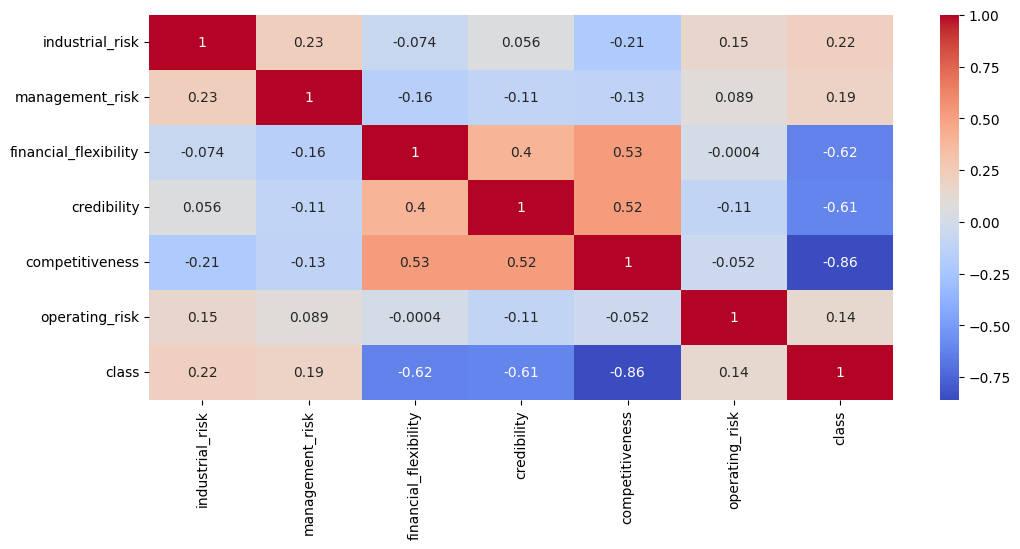

In [13]:
# @title $Correlation \ \ \& \ \ Heatmap$
# Plotting the heatmap
plt.figure(figsize=(12,5), dpi = 100)
corr = df1.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

* Columns 'industrial_risk', 'management_risk', 'operating_risk' are positively correlated with the column 'class'. Which states that whenever there is high industrial, management and operating risk then there are more chances of business to go bankrupt

* Whereas columns 'financial_flexibility', 'credibility', 'competitiveness' are negatively correlated with column 'class'. Which states that whenever there is high financial flexibility, high credibility, high competitiveness then there are very less chances that the business will go bankrupt.

In [14]:
# @title $Data \ \ of \ \ Businesses \ \ which \ \ gone \ \ Bankrupt$
df_bankrupt = df1[df1['class'] == 1]
df_bankrupt

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,1
1,0.0,1.0,0.0,0.0,0.0,1.0,1
2,1.0,0.0,0.0,0.0,0.0,1.0,1
3,0.5,0.0,0.0,0.5,0.0,1.0,1
4,1.0,1.0,0.0,0.0,0.0,1.0,1
5,1.0,1.0,0.0,0.5,0.0,0.5,1
6,1.0,1.0,0.0,0.0,0.0,0.0,1
7,1.0,1.0,0.0,0.0,0.0,0.5,1
8,1.0,1.0,0.0,0.5,0.0,0.0,1
9,1.0,1.0,0.0,0.5,0.0,1.0,1


In [15]:
# @title $Shape \ \ of \ \ df\_bankrupt$
df_bankrupt.shape

(25, 7)

* Out of 103 records only 25 are of class bankrupt

* Data is imbalanced in the favor of class non-bankrupty, we have to take this in mind while applying machine learning algorithms

In [16]:
# @title $Columns$
columns=df1.columns.tolist()
print(columns)

['industrial_risk', 'management_risk', 'financial_flexibility', 'credibility', 'competitiveness', 'operating_risk', 'class']


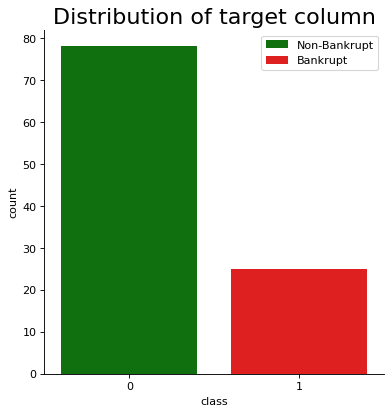

In [17]:
# @title $Distribution \ \ of \ \ target \ \ among \ \ Non-Bankrupt \ \ \& \ \ Bankrupt$
sns.catplot(data=df1, x='class', kind="count", palette=['green', 'red'])
plt.title('Distribution of target column', fontsize=20)
plt.legend(['Non-Bankrupt','Bankrupt'])
plt.show()

<IPython.core.display.Math object>

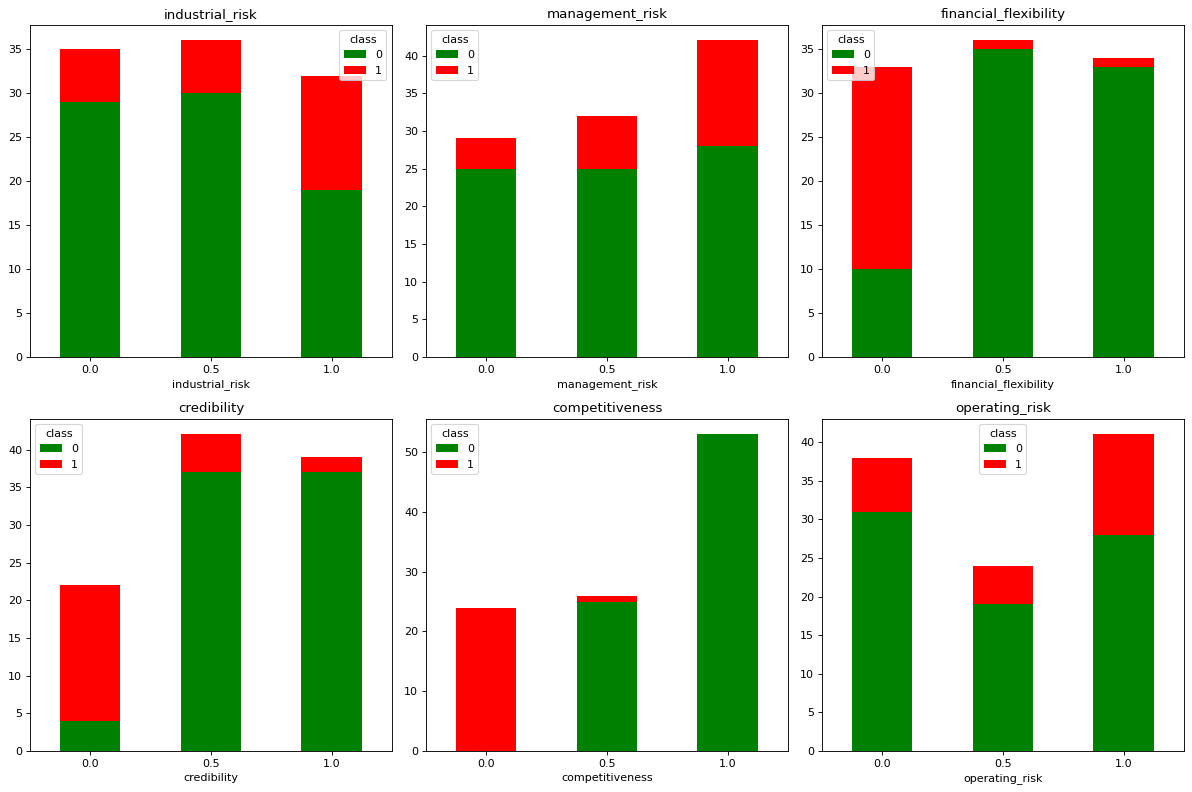

In [18]:
# @title $Distribution \ \ of \ \ features \ \ among \ \ the \ \ classes$
features = df1.columns.tolist()
features.remove('class')

#display(Math(r'\Large{Distribution \ \ of \ \ features \ \ among \ \ the \ \ classes}'))
display(Math(r'\Large{ {\color{green}{0 : Non-Bankrupt}} \ \ \& \ \ {\color{red}{1 : Bankrupt}}}'))
figure, axes = plt.subplots(2, 3, figsize=(15,10))
for i,col in enumerate(features):
    my_crosstab1 = pd.crosstab(index=df1[col], columns=df1['class'])
    my_crosstab1.plot(kind='bar',stacked=True, rot=0,ax=axes[i//3,i%3], title = col, color=['green', 'red'])

plt.tight_layout()
plt.show()

* High Financial flexibility, Credibility, Competitiveness strongly suggest Non-Bankrupty and vice versa

In [19]:
# @title $Predictive \ \ Power \ \ Score \ \ $
pp = pps.matrix(df1)
pp

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,industrial_risk,industrial_risk,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,industrial_risk,management_risk,0.027414,regression,True,mean absolute error,0.344660,0.335212,DecisionTreeRegressor()
2,industrial_risk,financial_flexibility,0.000000,regression,True,mean absolute error,0.325243,0.346374,DecisionTreeRegressor()
3,industrial_risk,credibility,0.000000,regression,True,mean absolute error,0.296117,0.326233,DecisionTreeRegressor()
4,industrial_risk,competitiveness,0.000000,regression,True,mean absolute error,0.359223,0.370462,DecisionTreeRegressor()
5,industrial_risk,operating_risk,0.000000,regression,True,mean absolute error,0.383495,0.405447,DecisionTreeRegressor()
6,industrial_risk,class,0.000000,regression,True,mean absolute error,0.242718,0.350811,DecisionTreeRegressor()
7,management_risk,industrial_risk,0.000000,regression,True,mean absolute error,0.325243,0.345025,DecisionTreeRegressor()
8,management_risk,management_risk,1.000000,predict_itself,True,None,0.000000,1.000000,None
9,management_risk,financial_flexibility,0.000000,regression,True,mean absolute error,0.325243,0.348322,DecisionTreeRegressor()


In [20]:
# @title $PPS \ \ of \ \ feature \ \ against \ \ target$
pp[pp.y=='class']

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
6,industrial_risk,class,0.000000,regression,True,mean absolute error,0.242718,0.350811,DecisionTreeRegressor()
13,management_risk,class,0.000000,regression,True,mean absolute error,0.242718,0.365623,DecisionTreeRegressor()
20,financial_flexibility,class,0.267600,regression,True,mean absolute error,0.242718,0.177767,DecisionTreeRegressor()
27,credibility,class,0.196532,regression,True,mean absolute error,0.242718,0.195016,DecisionTreeRegressor()
34,competitiveness,class,0.918726,regression,True,mean absolute error,0.242718,0.019727,DecisionTreeRegressor()
41,operating_risk,class,0.000000,regression,True,mean absolute error,0.242718,0.375148,DecisionTreeRegressor()
48,class,class,1.000000,predict_itself,True,None,0.000000,1.000000,None


* PPS Score suggest that the features industrial_risk, management_risk and operating_risk are not important to predict Bankrupty

In [21]:
# @title $Feature \ \ Importance \ \ (Using \ \ DecisionTreeClassifier)$
x= df1.iloc[:,0:-1]
y= df1.iloc[:,-1]
#feature importance
model = DecisionTreeClassifier()
model.fit(x, y)
imp = {'columns':x.columns ,'Feature_imp':model.feature_importances_ }
pd.DataFrame(imp)

,columns,Feature_imp
0,industrial_risk,0.000000
1,management_risk,0.000000
2,financial_flexibility,0.000000
3,credibility,0.009895
4,competitiveness,0.963694
5,operating_risk,0.026410


* The featues Industrial  Risk,  Management  Risk &  Operating  Risk all are having PPS score zero and feature importance score also zero, so these features are not important to predict Bankrupty, so we will drop these features.

In [22]:
# @title $Remove \ \ the \ \ features \ \ Industrial \ \ Risk, \ \ Management \ \ Risk\ \& \ \ Operating \ \ Risk $
df2 = df1.copy()
#df2.drop(['management_risk', 'operating_risk'], axis=1, inplace=True)
df2

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,1
1,0.0,1.0,0.0,0.0,0.0,1.0,1
2,1.0,0.0,0.0,0.0,0.0,1.0,1
3,0.5,0.0,0.0,0.5,0.0,1.0,1
4,1.0,1.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...
185,0.0,0.5,0.0,0.5,1.0,0.5,0
187,0.0,0.5,0.5,0.5,1.0,0.5,0
190,0.0,0.5,0.5,0.0,1.0,0.0,0
192,0.5,1.0,0.0,0.0,1.0,0.0,0


### This indictes that low financial flexibility, low credibility and low competitiveness are the major reasons for bankrupty

In [23]:
# @title $SweetViz$
sweet_report = sv.analyze(df1)
sweet_report.show_html('bankruptancy.html')

                                             |          | [  0%]   00:00 -> (? left)

Report bankruptancy.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# $Models$

In [24]:
# @title $Train-Test \ \ Split$
X = df2.drop('class', axis=1)
y = df2['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (82, 6)
X_test shape: (21, 6)
y_train shape: (82,)
y_test shape: (21,)


### As the dataset is imbalanced, we apply Oversampling

In [25]:
# @title $Oversampling$
# Oversampling using RandomOverSampler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X_train, y_train)
print("Oversampled class distribution:", Counter(y_over))

Oversampled class distribution: Counter({0: 62, 1: 62})


In [26]:
# @title $Function \ \ to \ \ Apply \ \ Model$
def apply_model(model, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)

    print(f"1) Train Accuracy : {model.score(X_train,y_train)}")

    print(f"2) Test Accuracy : {model.score(X_test,y_test)}")

    print('3) Classification Report :')
    print(classification_report(y_test,y_pred))

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print('4) ROC_AUC Score :', roc_auc)
    print("5) Bankrupty :", sum(y_pred!=0))
    print("6) Non-Bankrupty : ", sum(y_pred==0))

    print()
    print('7) Confusion Matrix :')
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    print(cm)

    return (model.score(X_train,y_train), model.score(X_test,y_test))

In [27]:
# @title $Function \ \ to \ \ Evaluate \ \ Models$

def stratified_cv(model, X, y, shuffle=False, n_folds=5, random_state=42):
    skf = StratifiedKFold(n_splits=n_folds, shuffle=shuffle, random_state=random_state)
    lst_accu_stratified = []

    # Convert DataFrame to NumPy array
    X_array = X.values

    for train_index, test_index in skf.split(X_array, y): # Use X_array for splitting
        X_train_fold, X_test_fold = X_array[train_index], X_array[test_index] # Index the NumPy array
        y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index] # Use iloc to index the Series
        X_over, y_over = oversample.fit_resample(X_train_fold, y_train_fold)
        model.fit(X_train_fold, y_train_fold)
        lst_accu_stratified.append(model.score(X_test_fold, y_test_fold))

    # Print the output.
    print('List of possible accuracy:', lst_accu_stratified)
    print('\nMaximum Accuracy That can be obtained from this model is:', max(lst_accu_stratified)*100, '%')
    print('\nMinimum Accuracy:', min(lst_accu_stratified)*100, '%')
    print('\nOverall Accuracy:', np.mean(lst_accu_stratified)*100, '%')
    print('\nStandard Deviation is:', np.std(lst_accu_stratified))

    return np.mean(lst_accu_stratified)*100

In [28]:
# @title $Function \ \ to \ \ Perform \ \ Hyperparameter \ \ Tunning$
def hyperparameter_tuning(model, random_grid, X_train, y_train, X_test, y_test):
    rf_random = GridSearchCV(model, random_grid, cv=10, verbose = 10)
    rf_random.fit(X_train, y_train)
    y_pred = rf_random.predict(X_test)
    print(f"1) Train Accuracy : {rf_random.score(X_train,y_train)}")
    print(f"2) Test Accuracy : {rf_random.score(X_test,y_test)}")
    print('3) Classification Report')
    print(classification_report(y_test,y_pred))
    print("4) Best Score :", rf_random.best_score_)
    print("5) Best Parameters :",rf_random.best_params_)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    #roc_auc
    print('6) ROC_AUC Score :', roc_auc)
    print(f"7) Confusion matrix : \n {confusion_matrix(y_test, y_pred)}\n")
    return rf_random

#$1 : Logistic \ \ Regression$

In [29]:
# @title $Model$
dict_model_Acc = {}
model1 = LogisticRegression(random_state=42)
train_acc, test_acc = apply_model(model=model1, X_train=X_over, y_train=y_over)

1) Train Accuracy : 1.0
2) Test Accuracy : 1.0
3) Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00         5

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21

4) ROC_AUC Score : 1.0
5) Bankrupty : 5
6) Non-Bankrupty :  16

7) Confusion Matrix :
[[16  0]
 [ 0  5]]


In [30]:
# @title $Cross \ \ Validation$
overall_acc = stratified_cv(LogisticRegression(),X, y, shuffle=True, n_folds=5, random_state=42)

List of possible accuracy: [1.0, 0.9523809523809523, 1.0, 0.95, 1.0]

Maximum Accuracy That can be obtained from this model is: 100.0 %

Minimum Accuracy: 95.0 %

Overall Accuracy: 98.04761904761905 %

Standard Deviation is: 0.02392353654681997


In [31]:
# @title $Hyperparameters \ \ Tunning$

model = LogisticRegression()
random_grid = {'penalty':['l1', 'l2', 'elasticnet', None],
               'class_weight':['balanced', None],
               #'solver' : ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
               #'tol':[0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1],
               #'C':[1.0, 1.5],
               'n_jobs':[10,20,30,40,50],
               }
tunned_model = hyperparameter_tuning(model, random_grid, X_over, y_over, X_test, y_test)

Fitting 10 folds for each of 40 candidates, totalling 400 fits
[CV 1/10; 1/40] START class_weight=balanced, n_jobs=10, penalty=l1..............
[CV 1/10; 1/40] END class_weight=balanced, n_jobs=10, penalty=l1;, score=nan total time=   0.0s
[CV 2/10; 1/40] START class_weight=balanced, n_jobs=10, penalty=l1..............
[CV 2/10; 1/40] END class_weight=balanced, n_jobs=10, penalty=l1;, score=nan total time=   0.0s
[CV 3/10; 1/40] START class_weight=balanced, n_jobs=10, penalty=l1..............
[CV 3/10; 1/40] END class_weight=balanced, n_jobs=10, penalty=l1;, score=nan total time=   0.0s
[CV 4/10; 1/40] START class_weight=balanced, n_jobs=10, penalty=l1..............
[CV 4/10; 1/40] END class_weight=balanced, n_jobs=10, penalty=l1;, score=nan total time=   0.0s
[CV 5/10; 1/40] START class_weight=balanced, n_jobs=10, penalty=l1..............
[CV 5/10; 1/40] END class_weight=balanced, n_jobs=10, penalty=l1;, score=nan total time=   0.0s
[CV 6/10; 1/40] START class_weight=balanced, n_jobs=

In [32]:
# @title $Cross \ \ Validation \ \ after \ \ Hyperparameter \ \ Tunning$
overall_acc = stratified_cv(LogisticRegression(penalty ='l2', class_weight = 'balanced', tol = 0.0001, n_jobs = 10),X, y, shuffle=True, n_folds=5, random_state=42)

List of possible accuracy: [1.0, 0.9523809523809523, 1.0, 1.0, 1.0]

Maximum Accuracy That can be obtained from this model is: 100.0 %

Minimum Accuracy: 95.23809523809523 %

Overall Accuracy: 99.04761904761905 %

Standard Deviation is: 0.019047619047619067


In [33]:
# @title $Final \ \ Model$

model1 = LogisticRegression(penalty ='l2', class_weight = 'balanced', tol = 0.0001, n_jobs = 10, random_state=42)
train_acc, test_acc = apply_model(model=model1, X_train=X_over, y_train=y_over)

dict_model_Acc['Logistic Regression'] = [train_acc, test_acc, overall_acc]

1) Train Accuracy : 1.0
2) Test Accuracy : 1.0
3) Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00         5

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21

4) ROC_AUC Score : 1.0
5) Bankrupty : 5
6) Non-Bankrupty :  16

7) Confusion Matrix :
[[16  0]
 [ 0  5]]


# $2 : Support \ \ Vector \ \ Classifier$

In [34]:
# @title $Model$

model2 = SVC(random_state=42)
train_acc, test_acc = apply_model(model=model2, X_train=X_over, y_train=y_over)

1) Train Accuracy : 1.0
2) Test Accuracy : 0.9523809523809523
3) Classification Report :
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.80      0.89         5

    accuracy                           0.95        21
   macro avg       0.97      0.90      0.93        21
weighted avg       0.96      0.95      0.95        21

4) ROC_AUC Score : 0.9
5) Bankrupty : 4
6) Non-Bankrupty :  17

7) Confusion Matrix :
[[16  0]
 [ 1  4]]


In [35]:
# @title $Cross \ \ Validation$

overall_acc = stratified_cv(SVC(),X, y, shuffle=True, n_folds=5, random_state=42)

List of possible accuracy: [1.0, 0.9523809523809523, 1.0, 0.95, 1.0]

Maximum Accuracy That can be obtained from this model is: 100.0 %

Minimum Accuracy: 95.0 %

Overall Accuracy: 98.04761904761905 %

Standard Deviation is: 0.02392353654681997


In [36]:
# @title $Hyperparameters \ \ Tunning$

model = SVC()
random_grid = {'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
               'C' : [0.1, 0.5, 1],
               'gamma' : [1, 0.1, 0.01],
               'tol':[0.0001, 0.001, 0.01, 0.05, 0.1],
               }
tunned_model = hyperparameter_tuning(model, random_grid, X_over, y_over, X_test, y_test)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits
[CV 1/10; 1/180] START C=0.1, gamma=1, kernel=linear, tol=0.0001................
[CV 1/10; 1/180] END C=0.1, gamma=1, kernel=linear, tol=0.0001;, score=1.000 total time=   0.0s
[CV 2/10; 1/180] START C=0.1, gamma=1, kernel=linear, tol=0.0001................
[CV 2/10; 1/180] END C=0.1, gamma=1, kernel=linear, tol=0.0001;, score=1.000 total time=   0.0s
[CV 3/10; 1/180] START C=0.1, gamma=1, kernel=linear, tol=0.0001................
[CV 3/10; 1/180] END C=0.1, gamma=1, kernel=linear, tol=0.0001;, score=1.000 total time=   0.0s
[CV 4/10; 1/180] START C=0.1, gamma=1, kernel=linear, tol=0.0001................
[CV 4/10; 1/180] END C=0.1, gamma=1, kernel=linear, tol=0.0001;, score=1.000 total time=   0.0s
[CV 5/10; 1/180] START C=0.1, gamma=1, kernel=linear, tol=0.0001................
[CV 5/10; 1/180] END C=0.1, gamma=1, kernel=linear, tol=0.0001;, score=1.000 total time=   0.0s
[CV 6/10; 1/180] START C=0.1, gamma=1, kernel=line

In [37]:
# @title $Cross \ \ Validation \ \ after \ \ Hyperparameter \ \ Tunning$

overall_acc = stratified_cv(SVC(C=0.1, gamma=1, kernel='linear', tol=0.0001),X, y, shuffle=True, n_folds=5, random_state=42)

List of possible accuracy: [1.0, 0.9523809523809523, 1.0, 1.0, 1.0]

Maximum Accuracy That can be obtained from this model is: 100.0 %

Minimum Accuracy: 95.23809523809523 %

Overall Accuracy: 99.04761904761905 %

Standard Deviation is: 0.019047619047619067


In [38]:
# @title $Final \ \ Model$

model2 = SVC(C=0.1, gamma=1, kernel='linear', tol=0.0001, random_state=42)
train_acc, test_acc = apply_model(model=model2, X_train=X_over, y_train=y_over)

dict_model_Acc['Support Vector Classifier'] = [train_acc, test_acc, overall_acc]

1) Train Accuracy : 1.0
2) Test Accuracy : 1.0
3) Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00         5

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21

4) ROC_AUC Score : 1.0
5) Bankrupty : 5
6) Non-Bankrupty :  16

7) Confusion Matrix :
[[16  0]
 [ 0  5]]


#$3 : Decision \ \ Tree \ \ Classifier$

In [40]:
# @title $Model$

model3 = DecisionTreeClassifier(random_state=42)
train_acc, test_acc = apply_model(model=model3, X_train=X_over, y_train=y_over)

1) Train Accuracy : 1.0
2) Test Accuracy : 0.9523809523809523
3) Classification Report :
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.80      0.89         5

    accuracy                           0.95        21
   macro avg       0.97      0.90      0.93        21
weighted avg       0.96      0.95      0.95        21

4) ROC_AUC Score : 0.9
5) Bankrupty : 4
6) Non-Bankrupty :  17

7) Confusion Matrix :
[[16  0]
 [ 1  4]]


In [41]:
# @title $Cross \ \ Validation$
overall_acc = stratified_cv(DecisionTreeClassifier(),X, y, shuffle=True, n_folds=5, random_state=42)

List of possible accuracy: [1.0, 1.0, 1.0, 0.95, 0.95]

Maximum Accuracy That can be obtained from this model is: 100.0 %

Minimum Accuracy: 95.0 %

Overall Accuracy: 98.00000000000001 %

Standard Deviation is: 0.024494897427831803


In [42]:
# @title $Hyperparameters \ \ Tunning$

model = DecisionTreeClassifier()
random_grid = {'criterion' : ["gini", "entropy", "log_loss"],
               'splitter' : ["best", "random"],
               'max_depth' : [1,3,7],
               'min_samples_split' : [2,4,6],
               'min_samples_leaf' : [2,5,8,10],
               'max_features' : ["auto", "sqrt", "log2"],
               }
tunned_model = hyperparameter_tuning(model, random_grid, X_over, y_over, X_test, y_test)

Streaming output truncated to the last 5000 lines.
[CV 10/10; 399/648] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, splitter=best;, score=0.917 total time=   0.0s
[CV 1/10; 400/648] START criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, splitter=random
[CV 1/10; 400/648] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, splitter=random;, score=0.923 total time=   0.0s
[CV 2/10; 400/648] START criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, splitter=random
[CV 2/10; 400/648] END criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, splitter=random;, score=0.769 total time=   0.0s
[CV 3/10; 400/648] START criterion=entropy, max_depth=7, max_features=sqrt, min_samples_leaf=8, min_samples_split=4, splitter=random
[CV 3/10; 400/648] END criterion=entropy, max_depth=7, max_

In [43]:
# @title $Cross \ \ Validation \ \ after \ \ Hyperparameter \ \ Tunning$
overall_acc = stratified_cv(DecisionTreeClassifier(criterion = 'gini', max_depth = 7, max_features = 'log2', min_samples_leaf = 2, min_samples_split = 4, splitter = 'best'),X, y, shuffle=True, n_folds=5, random_state=42)

List of possible accuracy: [1.0, 0.9523809523809523, 0.9523809523809523, 0.95, 1.0]

Maximum Accuracy That can be obtained from this model is: 100.0 %

Minimum Accuracy: 95.0 %

Overall Accuracy: 97.09523809523809 %

Standard Deviation is: 0.02373321103690881


In [44]:
# @title $Final \ \ Model$

model3 = DecisionTreeClassifier(criterion = 'gini', max_depth = 2, max_features = 'sqrt', min_samples_leaf = 1, min_samples_split = 3, splitter = 'best', random_state=42)
train_acc, test_acc = apply_model(model=model3, X_train=X_over, y_train=y_over)
dict_model_Acc['Decision Tree Classifier'] = [train_acc, test_acc, overall_acc]

1) Train Accuracy : 1.0
2) Test Accuracy : 0.9523809523809523
3) Classification Report :
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.80      0.89         5

    accuracy                           0.95        21
   macro avg       0.97      0.90      0.93        21
weighted avg       0.96      0.95      0.95        21

4) ROC_AUC Score : 0.9
5) Bankrupty : 4
6) Non-Bankrupty :  17

7) Confusion Matrix :
[[16  0]
 [ 1  4]]


# $4 : Random \ \ Forest \ \ Classifier$

In [45]:
# @title $Model$

model4 = RandomForestClassifier(random_state=42)
train_acc, test_acc = apply_model(model=model4, X_train=X_over, y_train=y_over)

1) Train Accuracy : 1.0
2) Test Accuracy : 0.9523809523809523
3) Classification Report :
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.80      0.89         5

    accuracy                           0.95        21
   macro avg       0.97      0.90      0.93        21
weighted avg       0.96      0.95      0.95        21

4) ROC_AUC Score : 0.9
5) Bankrupty : 4
6) Non-Bankrupty :  17

7) Confusion Matrix :
[[16  0]
 [ 1  4]]


In [46]:
# @title $Cross \ \ Validation$
overall_acc = stratified_cv(RandomForestClassifier(),X, y, shuffle=True, n_folds=5, random_state=42)

List of possible accuracy: [1.0, 1.0, 1.0, 1.0, 1.0]

Maximum Accuracy That can be obtained from this model is: 100.0 %

Minimum Accuracy: 100.0 %

Overall Accuracy: 100.0 %

Standard Deviation is: 0.0


In [47]:
# @title $Hyperparameters \ \ Tunning$

model = RandomForestClassifier()
random_grid = {'n_estimators':[10,50,100],
               'criterion':["gini", "entropy", "log_loss"],
               'max_depth' : [2,5,9],
               'min_samples_split' : [2,7,10],
               #'min_samples_leaf' : [1,2,3,4,5,6,7,8,9,10],
               'max_features' : ["sqrt", "log2",None],
               }
tunned_model = hyperparameter_tuning(model, random_grid, X_over, y_over, X_test, y_test)

Fitting 10 folds for each of 243 candidates, totalling 2430 fits
[CV 1/10; 1/243] START criterion=gini, max_depth=2, max_features=sqrt, min_samples_split=2, n_estimators=10
[CV 1/10; 1/243] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.0s
[CV 2/10; 1/243] START criterion=gini, max_depth=2, max_features=sqrt, min_samples_split=2, n_estimators=10
[CV 2/10; 1/243] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.0s
[CV 3/10; 1/243] START criterion=gini, max_depth=2, max_features=sqrt, min_samples_split=2, n_estimators=10
[CV 3/10; 1/243] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_split=2, n_estimators=10;, score=1.000 total time=   0.0s
[CV 4/10; 1/243] START criterion=gini, max_depth=2, max_features=sqrt, min_samples_split=2, n_estimators=10
[CV 4/10; 1/243] END criterion=gini, max_depth=2, max_features=sqrt, min_samples_split

In [48]:
# @title $Cross \ \ Validation \ \ After \ \ Hyperparameter \ \ Tunning$
overall_acc = stratified_cv(RandomForestClassifier(criterion='gini', max_depth=2, max_features='sqrt', min_samples_split=2, n_estimators=10),X, y, shuffle=True, n_folds=5, random_state=42)

List of possible accuracy: [1.0, 0.8571428571428571, 1.0, 0.95, 1.0]

Maximum Accuracy That can be obtained from this model is: 100.0 %

Minimum Accuracy: 85.71428571428571 %

Overall Accuracy: 96.14285714285714 %

Standard Deviation is: 0.05562263523980512


In [49]:
# @title $Final \ \ Model$
model4 = RandomForestClassifier(criterion='gini', max_depth=2, max_features='sqrt', min_samples_split=2, n_estimators=10, random_state=42)
train_acc, test_acc = apply_model(model=model4, X_train=X_over, y_train=y_over)
dict_model_Acc['Random Forest Classifier'] = [train_acc, test_acc, overall_acc]

1) Train Accuracy : 1.0
2) Test Accuracy : 0.9523809523809523
3) Classification Report :
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.80      0.89         5

    accuracy                           0.95        21
   macro avg       0.97      0.90      0.93        21
weighted avg       0.96      0.95      0.95        21

4) ROC_AUC Score : 0.9
5) Bankrupty : 4
6) Non-Bankrupty :  17

7) Confusion Matrix :
[[16  0]
 [ 1  4]]


#$5 : K-Neighbors \ \ Classifier$

In [50]:
# @title $Model$
model5 = KNeighborsClassifier()
train_acc, test_acc = apply_model(model=model5, X_train=X_over, y_train=y_over)

1) Train Accuracy : 0.9919354838709677
2) Test Accuracy : 1.0
3) Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00         5

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21

4) ROC_AUC Score : 1.0
5) Bankrupty : 5
6) Non-Bankrupty :  16

7) Confusion Matrix :
[[16  0]
 [ 0  5]]


In [51]:
# @title $Cross \ \ Validation$
overall_acc = stratified_cv(KNeighborsClassifier(), X, y, shuffle=True, n_folds=5, random_state=42)

List of possible accuracy: [1.0, 0.9523809523809523, 1.0, 1.0, 1.0]

Maximum Accuracy That can be obtained from this model is: 100.0 %

Minimum Accuracy: 95.23809523809523 %

Overall Accuracy: 99.04761904761905 %

Standard Deviation is: 0.019047619047619067


In [52]:
# @title $Hyperparameters \ \ Tunning \ \ on \ \ KNN$

model = KNeighborsClassifier()
random_grid = {'algorithm':['auto', 'kd_tree', 'ball_tree', 'brute'],
               'n_neighbors':[3,5,7,9]}
tunned_model = hyperparameter_tuning(model, random_grid, X_over, y_over, X_test, y_test)

Fitting 10 folds for each of 16 candidates, totalling 160 fits
[CV 1/10; 1/16] START algorithm=auto, n_neighbors=3.............................
[CV 1/10; 1/16] END algorithm=auto, n_neighbors=3;, score=1.000 total time=   0.0s
[CV 2/10; 1/16] START algorithm=auto, n_neighbors=3.............................
[CV 2/10; 1/16] END algorithm=auto, n_neighbors=3;, score=1.000 total time=   0.0s
[CV 3/10; 1/16] START algorithm=auto, n_neighbors=3.............................
[CV 3/10; 1/16] END algorithm=auto, n_neighbors=3;, score=1.000 total time=   0.0s
[CV 4/10; 1/16] START algorithm=auto, n_neighbors=3.............................
[CV 4/10; 1/16] END algorithm=auto, n_neighbors=3;, score=1.000 total time=   0.0s
[CV 5/10; 1/16] START algorithm=auto, n_neighbors=3.............................
[CV 5/10; 1/16] END algorithm=auto, n_neighbors=3;, score=1.000 total time=   0.0s
[CV 6/10; 1/16] START algorithm=auto, n_neighbors=3.............................
[CV 6/10; 1/16] END algorithm=auto, 

In [53]:
# @title $Cross \ \ Validation \ \ after \ \ Hyperparameters \ \ Tunning$
overall_acc = stratified_cv(KNeighborsClassifier(algorithm = 'auto', n_neighbors=3), X, y, shuffle=True, n_folds=5, random_state=42)

List of possible accuracy: [1.0, 0.9523809523809523, 1.0, 1.0, 1.0]

Maximum Accuracy That can be obtained from this model is: 100.0 %

Minimum Accuracy: 95.23809523809523 %

Overall Accuracy: 99.04761904761905 %

Standard Deviation is: 0.019047619047619067


In [54]:
# @title $Final \ \ Model$
model5 = KNeighborsClassifier(algorithm = 'auto', n_neighbors=3)
train_acc, test_acc = apply_model(model=model5, X_train=X_over, y_train=y_over)

dict_model_Acc['K-Neighbors Classifier'] = [train_acc, test_acc, overall_acc]

1) Train Accuracy : 1.0
2) Test Accuracy : 1.0
3) Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00         5

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21

4) ROC_AUC Score : 1.0
5) Bankrupty : 5
6) Non-Bankrupty :  16

7) Confusion Matrix :
[[16  0]
 [ 0  5]]


#$6 : Bagging \ \ Classifier$

In [55]:
# @title $Model$
model6 = BaggingClassifier(base_estimator=DecisionTreeClassifier())
train_acc, test_acc = apply_model(model=model6, X_train=X_over, y_train=y_over)

1) Train Accuracy : 1.0
2) Test Accuracy : 0.9523809523809523
3) Classification Report :
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.80      0.89         5

    accuracy                           0.95        21
   macro avg       0.97      0.90      0.93        21
weighted avg       0.96      0.95      0.95        21

4) ROC_AUC Score : 0.9
5) Bankrupty : 4
6) Non-Bankrupty :  17

7) Confusion Matrix :
[[16  0]
 [ 1  4]]


In [56]:
# @title $Cross \ \ Validation$

# Create a Bagging Classifier with a Decision Tree as the base estimator
bagging_model = BaggingClassifier(base_estimator=DecisionTreeClassifier())

# Evaluate the Bagging Classifier using the stratified cross-validation function
overall_acc = stratified_cv(bagging_model, X, y, shuffle=True, n_folds=5, random_state=42)

List of possible accuracy: [1.0, 1.0, 1.0, 0.95, 1.0]

Maximum Accuracy That can be obtained from this model is: 100.0 %

Minimum Accuracy: 95.0 %

Overall Accuracy: 99.0 %

Standard Deviation is: 0.020000000000000018


In [57]:
# @title $Hyperparameters \ \ Tunning \ \ on \ \ Bagging \ \ Classifier$

model = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                #   n_estimators=20,  # Number of base estimators (trees)
                                #   random_state=42
                          )
random_grid = {
    'base_estimator__criterion' : ["gini", "entropy", "log_loss"],
    'base_estimator__splitter' : ["best", "random"],
    'base_estimator__max_depth' : [1,2,3,4,5,6,7,8,9,10],
    'n_estimators' :[10,20,30,40,50],
}
tunned_model = hyperparameter_tuning(model, random_grid, X_over, y_over, X_test, y_test)

Streaming output truncated to the last 5000 lines.
[CV 10/10; 51/300] END base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__splitter=best, n_estimators=10;, score=1.000 total time=   0.0s
[CV 1/10; 52/300] START base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__splitter=best, n_estimators=20
[CV 1/10; 52/300] END base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__splitter=best, n_estimators=20;, score=1.000 total time=   0.0s
[CV 2/10; 52/300] START base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__splitter=best, n_estimators=20
[CV 2/10; 52/300] END base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__splitter=best, n_estimators=20;, score=1.000 total time=   0.0s
[CV 3/10; 52/300] START base_estimator__criterion=gini, base_estimator__max_depth=6, base_estimator__splitter=best, n_estimators=20
[CV 3/10; 52/300] END base_estimator__criterion=gini, base_esti

In [58]:
# @title $Cross \ \ Validation \ \ After \ \ Hyperparameter \ \ Tunning$

# Create a DecisionTreeClassifier with desired parameters
base_estimator = DecisionTreeClassifier(criterion='gini', max_depth=1, splitter='best')

# Create a Bagging Classifier with the configured Decision Tree as the base estimator
bagging_model = BaggingClassifier(base_estimator=base_estimator,
                                  n_estimators=10,
                                  random_state=42)

# Evaluate the Bagging Classifier using the stratified cross-validation function
overall_acc = stratified_cv(bagging_model, X, y, shuffle=True, n_folds=5, random_state=42)

List of possible accuracy: [1.0, 1.0, 1.0, 0.95, 1.0]

Maximum Accuracy That can be obtained from this model is: 100.0 %

Minimum Accuracy: 95.0 %

Overall Accuracy: 99.0 %

Standard Deviation is: 0.020000000000000018


In [59]:
# @title $Final \ \ Model$
model6 = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='gini', max_depth=1, splitter='best'),
                           n_estimators=10,
                           random_state=42)
train_acc, test_acc = apply_model(model=model6, X_train=X_over, y_train=y_over)
dict_model_Acc['Bagging Classifier'] = [train_acc, test_acc, overall_acc]

1) Train Accuracy : 1.0
2) Test Accuracy : 0.9523809523809523
3) Classification Report :
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.80      0.89         5

    accuracy                           0.95        21
   macro avg       0.97      0.90      0.93        21
weighted avg       0.96      0.95      0.95        21

4) ROC_AUC Score : 0.9
5) Bankrupty : 4
6) Non-Bankrupty :  17

7) Confusion Matrix :
[[16  0]
 [ 1  4]]


#$7 : XGB \ \ Classifier$

In [60]:
# @title $Model$
model7 = XGBClassifier()
train_acc, test_acc = apply_model(model=model7, X_train=X_over, y_train=y_over)

1) Train Accuracy : 1.0
2) Test Accuracy : 0.9523809523809523
3) Classification Report :
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.80      0.89         5

    accuracy                           0.95        21
   macro avg       0.97      0.90      0.93        21
weighted avg       0.96      0.95      0.95        21

4) ROC_AUC Score : 0.9
5) Bankrupty : 4
6) Non-Bankrupty :  17

7) Confusion Matrix :
[[16  0]
 [ 1  4]]


In [61]:
# @title $Cross \ \ Validation$

overall_acc = stratified_cv(XGBClassifier(), X, y, shuffle=True, n_folds=5, random_state=42)

List of possible accuracy: [1.0, 1.0, 1.0, 0.95, 1.0]

Maximum Accuracy That can be obtained from this model is: 100.0 %

Minimum Accuracy: 95.0 %

Overall Accuracy: 99.0 %

Standard Deviation is: 0.020000000000000018


In [62]:
# @title $Hyperparameters \ \ Tunning$

model = XGBClassifier()
random_grid = {'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.5, 0.7, 1]
}
tunned_model = hyperparameter_tuning(model, random_grid, X_train, y_train, X_test, y_test)

Fitting 10 folds for each of 27 candidates, totalling 270 fits
[CV 1/10; 1/27] START learning_rate=0.1, max_depth=3, subsample=0.5.............
[CV 1/10; 1/27] END learning_rate=0.1, max_depth=3, subsample=0.5;, score=1.000 total time=   0.9s
[CV 2/10; 1/27] START learning_rate=0.1, max_depth=3, subsample=0.5.............
[CV 2/10; 1/27] END learning_rate=0.1, max_depth=3, subsample=0.5;, score=1.000 total time=   0.2s
[CV 3/10; 1/27] START learning_rate=0.1, max_depth=3, subsample=0.5.............
[CV 3/10; 1/27] END learning_rate=0.1, max_depth=3, subsample=0.5;, score=1.000 total time=   0.0s
[CV 4/10; 1/27] START learning_rate=0.1, max_depth=3, subsample=0.5.............
[CV 4/10; 1/27] END learning_rate=0.1, max_depth=3, subsample=0.5;, score=1.000 total time=   0.0s
[CV 5/10; 1/27] START learning_rate=0.1, max_depth=3, subsample=0.5.............
[CV 5/10; 1/27] END learning_rate=0.1, max_depth=3, subsample=0.5;, score=1.000 total time=   0.0s
[CV 6/10; 1/27] START learning_rate=0

In [63]:
# @title $Cross \ \ Validation \ \ after \ \ Hyperparameters \ \ Tunning$
overall_acc = stratified_cv(XGBClassifier(learning_rate=0.1, max_depth=3, subsample=0.5), X, y, shuffle=True, n_folds=5, random_state=42)

List of possible accuracy: [1.0, 1.0, 1.0, 0.95, 1.0]

Maximum Accuracy That can be obtained from this model is: 100.0 %

Minimum Accuracy: 95.0 %

Overall Accuracy: 99.0 %

Standard Deviation is: 0.020000000000000018


In [64]:
# @title $Final \ \ Model$
model7 = XGBClassifier(learning_rate=0.1, max_depth=3, subsample=0.5)
train_acc, test_acc = apply_model(model=model7, X_train=X_over, y_train=y_over)

dict_model_Acc['XGB Classifier'] = [train_acc, test_acc, overall_acc]

1) Train Accuracy : 1.0
2) Test Accuracy : 0.9523809523809523
3) Classification Report :
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.80      0.89         5

    accuracy                           0.95        21
   macro avg       0.97      0.90      0.93        21
weighted avg       0.96      0.95      0.95        21

4) ROC_AUC Score : 0.9
5) Bankrupty : 4
6) Non-Bankrupty :  17

7) Confusion Matrix :
[[16  0]
 [ 1  4]]


#$8:LGBM \ \ Classifier$

In [65]:
# @title $Model$
model8 = lgb.LGBMClassifier()
train_acc, test_acc = apply_model(model=model8, X_train=X_over, y_train=y_over)

[LightGBM] [Info] Number of positive: 62, number of negative: 62
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001207 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18
[LightGBM] [Info] Number of data points in the train set: 124, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

In [66]:
# @title $Cross \ \ Validation$

overall_acc = stratified_cv(lgb.LGBMClassifier(), X, y, shuffle=True, n_folds=5, random_state=42)

[LightGBM] [Info] Number of positive: 20, number of negative: 62
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000045 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18
[LightGBM] [Info] Number of data points in the train set: 82, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.243902 -> initscore=-1.131402
[LightGBM] [Info] Start training from score -1.131402
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

In [67]:
# @title $Hyperparameters \ \ Tunning$

model = lgb.LGBMClassifier()
random_grid = {'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.5, 0.7, 1]
}
tunned_model = hyperparameter_tuning(model, random_grid, X_train, y_train, X_test, y_test)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [68]:
# @title $Cross \ \ Validation \ \ after \ \ Hyperparameters \ \ Tunning$
overall_acc = stratified_cv(lgb.LGBMClassifier(learning_rate=0.1, max_depth=3, subsample=0.5), X, y, shuffle=True, n_folds=5, random_state=42)

[LightGBM] [Info] Number of positive: 20, number of negative: 62
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000045 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18
[LightGBM] [Info] Number of data points in the train set: 82, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.243902 -> initscore=-1.131402
[LightGBM] [Info] Start training from score -1.131402
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

In [69]:
# @title $Final \ \ Model$
model8 = lgb.LGBMClassifier(learning_rate=0.1, max_depth=3, subsample=0.5)
train_acc, test_acc = apply_model(model=model8, X_train=X_over, y_train=y_over)
dict_model_Acc['LGBM Classifier'] = [train_acc, test_acc, overall_acc]

[LightGBM] [Info] Number of positive: 62, number of negative: 62
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000057 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18
[LightGBM] [Info] Number of data points in the train set: 124, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

#$9 : Naive \ \ Byase$

In [70]:
# @title $Model$
model9 = GaussianNB()
train_acc, test_acc = apply_model(model=model9, X_train=X_over, y_train=y_over)

1) Train Accuracy : 1.0
2) Test Accuracy : 0.9523809523809523
3) Classification Report :
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.80      0.89         5

    accuracy                           0.95        21
   macro avg       0.97      0.90      0.93        21
weighted avg       0.96      0.95      0.95        21

4) ROC_AUC Score : 0.9
5) Bankrupty : 4
6) Non-Bankrupty :  17

7) Confusion Matrix :
[[16  0]
 [ 1  4]]


In [71]:
# @title $Cross \ \ Validation$

overall_acc = stratified_cv(GaussianNB(), X, y, shuffle=True, n_folds=5, random_state=42)

List of possible accuracy: [1.0, 0.9523809523809523, 1.0, 0.95, 1.0]

Maximum Accuracy That can be obtained from this model is: 100.0 %

Minimum Accuracy: 95.0 %

Overall Accuracy: 98.04761904761905 %

Standard Deviation is: 0.02392353654681997


In [72]:
# @title $Hyperparameters \ \ Tunning$

model = GaussianNB()
random_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1]
}
tunned_model = hyperparameter_tuning(model, random_grid, X_train, y_train, X_test, y_test)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10; 1/10] START var_smoothing=1e-09.......................................
[CV 1/10; 1/10] END ........var_smoothing=1e-09;, score=1.000 total time=   0.0s
[CV 2/10; 1/10] START var_smoothing=1e-09.......................................
[CV 2/10; 1/10] END ........var_smoothing=1e-09;, score=1.000 total time=   0.0s
[CV 3/10; 1/10] START var_smoothing=1e-09.......................................
[CV 3/10; 1/10] END ........var_smoothing=1e-09;, score=1.000 total time=   0.0s
[CV 4/10; 1/10] START var_smoothing=1e-09.......................................
[CV 4/10; 1/10] END ........var_smoothing=1e-09;, score=1.000 total time=   0.0s
[CV 5/10; 1/10] START var_smoothing=1e-09.......................................
[CV 5/10; 1/10] END ........var_smoothing=1e-09;, score=0.875 total time=   0.0s
[CV 6/10; 1/10] START var_smoothing=1e-09.......................................
[CV 6/10; 1/10] END ........var_smoothing=1e-0

In [73]:
# @title $Cross \ \ Validation \ \ after \ \ Hyperparameters \ \ Tunning$
overall_acc = stratified_cv(GaussianNB(var_smoothing=1e-09), X, y, shuffle=True, n_folds=5, random_state=42)

List of possible accuracy: [1.0, 0.9523809523809523, 1.0, 0.95, 1.0]

Maximum Accuracy That can be obtained from this model is: 100.0 %

Minimum Accuracy: 95.0 %

Overall Accuracy: 98.04761904761905 %

Standard Deviation is: 0.02392353654681997


In [74]:
# @title $Final \ \ Model$
model9 = GaussianNB(var_smoothing=1e-09)
train_acc, test_acc = apply_model(model=model9, X_train=X_over, y_train=y_over)
dict_model_Acc['Naive Byase'] = [train_acc, test_acc, overall_acc]

1) Train Accuracy : 1.0
2) Test Accuracy : 0.9523809523809523
3) Classification Report :
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        16
           1       1.00      0.80      0.89         5

    accuracy                           0.95        21
   macro avg       0.97      0.90      0.93        21
weighted avg       0.96      0.95      0.95        21

4) ROC_AUC Score : 0.9
5) Bankrupty : 4
6) Non-Bankrupty :  17

7) Confusion Matrix :
[[16  0]
 [ 1  4]]


#$Final \ \ Model$

In [75]:
# @title $Comparision \ \ of \ \ Different \ \ Models $
models_acc = pd.DataFrame(dict_model_Acc).T
models_acc.columns = ['Train Accuracy', 'Test Accuracy', 'Overall Accuracy']
models_acc.index.name = 'Model'
models_acc.reset_index(inplace=True)
models_acc.sort_values(by='Overall Accuracy', ascending=False, inplace=True)
models_acc

,Model,Train Accuracy,Test Accuracy,Overall Accuracy
0,Logistic Regression,1.0,1.000000,99.047619
1,Support Vector Classifier,1.0,1.000000,99.047619
4,K-Neighbors Classifier,1.0,1.000000,99.047619
5,Bagging Classifier,1.0,0.952381,99.000000
6,XGB Classifier,1.0,0.952381,99.000000
7,LGBM Classifier,1.0,0.952381,99.000000
8,Naive Byase,1.0,0.952381,98.047619
2,Decision Tree Classifier,1.0,0.952381,97.095238
3,Random Forest Classifier,1.0,0.952381,96.142857


In [76]:
# @title $Function \ \ to \ \ Apply \ \ Model$
def apply_model(model, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)

    print(f"1) Train Accuracy : {model.score(X_train,y_train)}")

    print(f"2) Test Accuracy : {model.score(X_test,y_test)}")

    print('3) Classification Report :')
    print(classification_report(y_test,y_pred))

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print('4) ROC_AUC Score :', roc_auc)
    print("5) Bankrupty :", sum(y_pred!=0))
    print("6) Non-Bankrupty : ", sum(y_pred==0))

    print()
    print('7) Confusion Matrix :')
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    print(cm)

    return (model.score(X_train,y_train), model.score(X_test,y_test))

In [77]:
# @title $Final \ \ Model \ \ Support \ \ Vector \ \ Classifier$
final_model = SVC(C=0.1, gamma=1, kernel='linear', tol=0.0001, random_state=42)
final_model.fit(X_over,y_over)
y_pred = final_model.predict(X_test)
y_pred = final_model.predict(X_test)

print(f"1) Train Accuracy : {final_model.score(X_over,y_over)}")

print(f"2) Test Accuracy : {final_model.score(X_test,y_test)}")

print('3) Classification Report :')
print(classification_report(y_test,y_pred))

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('4) ROC_AUC Score :', roc_auc)
print("5) Bankrupty :", sum(y_pred!=0))
print("6) Non-Bankrupty : ", sum(y_pred==0))

print()
print('7) Confusion Matrix :')
cm = confusion_matrix(y_test, y_pred, labels=final_model.classes_)
print(cm)


1) Train Accuracy : 1.0
2) Test Accuracy : 1.0
3) Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00         5

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21

4) ROC_AUC Score : 1.0
5) Bankrupty : 5
6) Non-Bankrupty :  16

7) Confusion Matrix :
[[16  0]
 [ 0  5]]


# $Deploy \ \ Model \ \ Using \ \ Pickle$